<a href="https://colab.research.google.com/github/MJ199999/WaterPotability/blob/main/WaterQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data = pd.read_csv("water_potability.csv")

In [53]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [55]:
# from dataprep.eda import create_report
# create_report(data)

In [56]:
# data2 = data.dropna(axis=0)
data2 = data

print(data2.isna().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


## Remove Outliers

In [57]:
norm_upper_limit = data["Sulfate"].mean() + 3 * data["Sulfate"].std()
norm_lower_limit = data["Sulfate"].mean() - 3 * data["Sulfate"].std()

data_new = data[(data["Sulfate"] > norm_lower_limit) & (data["Sulfate"] < norm_upper_limit)]


norm_upper_limit = data["ph"].mean() + 3 * data["ph"].std()
norm_lower_limit = data["ph"].mean() - 3 * data["ph"].std()

data_new = data[(data["ph"] > norm_lower_limit) & (data["ph"] < norm_upper_limit)]


norm_upper_limit = data["Trihalomethanes"].mean() + 3 * data["Trihalomethanes"].std()
norm_lower_limit = data["Trihalomethanes"].mean() - 3 * data["Trihalomethanes"].std()

data_new = data[(data["Trihalomethanes"] > norm_lower_limit) & (data["Trihalomethanes"] < norm_upper_limit)]


norm_upper_limit = data["Solids"].mean() + 3 * data["Solids"].std()
norm_lower_limit = data["Solids"].mean() - 3 * data["Solids"].std()

data_new = data[(data["Solids"] > norm_lower_limit) & (data["Solids"] < norm_upper_limit)]


norm_upper_limit = data["Chloramines"].mean() + 3 * data["Chloramines"].std()
norm_lower_limit = data["Chloramines"].mean() - 3 * data["Chloramines"].std()

data_new = data[(data["Chloramines"] > norm_lower_limit) & (data["Chloramines"] < norm_upper_limit)]


norm_upper_limit = data["Conductivity"].mean() + 3 * data["Conductivity"].std()
norm_lower_limit = data["Conductivity"].mean() - 3 * data["Conductivity"].std()

data_new = data[(data["Conductivity"] > norm_lower_limit) & (data["Conductivity"] < norm_upper_limit)]


norm_upper_limit = data["Organic_carbon"].mean() + 3 * data["Organic_carbon"].std()
norm_lower_limit = data["Organic_carbon"].mean() - 3 * data["Organic_carbon"].std()

data_new = data[(data["Organic_carbon"] > norm_lower_limit) & (data["Organic_carbon"] < norm_upper_limit)]


norm_upper_limit = data["Turbidity"].mean() + 3 * data["Turbidity"].std()
norm_lower_limit = data["Turbidity"].mean() - 3 * data["Turbidity"].std()

data_new = data[(data["Turbidity"] > norm_lower_limit) & (data["Turbidity"] < norm_upper_limit)]


norm_upper_limit = data["Hardness"].mean() + 3 * data["Hardness"].std()
norm_lower_limit = data["Hardness"].mean() - 3 * data["Hardness"].std()

data_new = data[(data["Hardness"] > norm_lower_limit) & (data["Hardness"] < norm_upper_limit)]

### Fill Na - means

In [63]:
# Split train and test data
from sklearn.model_selection import train_test_split

X = data_new.drop(['Potability'], axis=1)
y = data_new.Potability

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1)
train = pd.concat([train_X, train_y], axis=1)
test = pd.concat([test_X, test_y], axis=1)

# Classify each dataset by label

train_potable = train[train['Potability']==1]
train_notpotable = train[train['Potability']==0]
test_potable = test[test['Potability']==1]
test_notpotable = test[test['Potability']==0]

# Fill NA of ph with means
train_potable_ph_means = train_potable['ph'].mean()
train_potable['ph'] = train_potable['ph'].fillna(train_potable_ph_means)
train_notpotable_ph_means = train_notpotable['ph'].mean()
train_notpotable['ph'] = train_notpotable['ph'].fillna(train_notpotable_ph_means)
test_potable['ph'] = test_potable['ph'].fillna(train_potable_ph_means)
test_notpotable['ph'] = test_notpotable['ph'].fillna(train_notpotable_ph_means)

# fill NA of Sulfate
train_potable_SF_means = train_potable['Sulfate'].mean()
train_potable['Sulfate'] = train_potable['Sulfate'].fillna(train_potable_SF_means)
train_notpotable_SF_means = train_notpotable['Sulfate'].mean()
train_notpotable['Sulfate'] = train_notpotable['Sulfate'].fillna(train_notpotable_SF_means)
test_potable['Sulfate'] = test_potable['Sulfate'].fillna(train_potable_SF_means)
test_notpotable['Sulfate'] = test_notpotable['Sulfate'].fillna(train_notpotable_SF_means)

# Fill NA of Trihalomethanes
train_potable_TM_means = train_potable['Trihalomethanes'].mean()
train_potable['Trihalomethanes'] = train_potable['Trihalomethanes'].fillna(train_potable_TM_means)
train_notpotable_TM_means = train_notpotable['Trihalomethanes'].mean()
train_notpotable['Trihalomethanes'] = train_notpotable['Trihalomethanes'].fillna(train_potable_TM_means)
test_potable['Trihalomethanes'] = test_potable['Trihalomethanes'].fillna(train_potable_TM_means)
test_notpotable['Trihalomethanes'] = test_notpotable['Trihalomethanes'].fillna(train_notpotable_TM_means)

# 
train = pd.concat([train_potable, train_notpotable], axis=0)
test = pd.concat([test_potable, test_notpotable], axis=0)

#
train_X = train.drop(['Potability'], axis=1)
train_y = train.Potability
test_X = test.drop(['Potability'], axis=1)
test_y = test.Potability

train data의 NA 개수: ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
test data의 NA 개수: ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


<ipython-input-63-1cfd0a8ecb18>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_potable['ph'] = train_potable['ph'].fillna(train_potable_ph_means)
<ipython-input-63-1cfd0a8ecb18>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_notpotable['ph'] = train_notpotable['ph'].fillna(train_notpotable_ph_means)
<ipython-input-63-1cfd0a8ecb18>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [64]:
# Check NA
print('train data의 NA 개수:', train.isna().sum())
print('test data의 NA 개수:', test.isna().sum())

train data의 NA 개수: ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
test data의 NA 개수: ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [65]:
from sklearn.utils import resample, shuffle

def sampling(train):
    train_potable = train[train['Potability']==1]
    train_notpotable = train[train['Potability']==0]
    df_minority_upsampled = resample(train_potable, replace=True, n_samples=1200)
    train_s = pd.concat([train_notpotable, df_minority_upsampled])
    train_s = shuffle(train_s)
    print(train_s.head(5))
    train_s_X = train_s.drop(['Potability'], axis=1)
    train_s_y =  train_s.Potability

    return train_s_X, train_s_y

train_s_X, train_s_y = sampling(train)

            ph    Hardness        Solids  Chloramines    Sulfate  \
1340  6.441766  174.781849  11306.261505     6.685755  334.62256   
1377  7.945407  211.800085  15938.286439     6.636454  385.65273   
1376  5.669819  203.452715  27244.634470     6.604950  334.62256   
1617  6.957434  214.380139  15007.421534     6.997160  328.81876   
1130  7.793915  164.958947  25506.912237     7.868036  358.25920   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
1340    544.354182       17.109829        89.122026   3.682134           0  
1377    392.166088        9.619021        40.233823   5.428917           0  
1376    361.238480       11.095060        68.923128   5.600459           0  
1617    468.555062       17.407261       104.207104   4.892050           1  
1130    398.460312       15.297496        66.752767   4.220028           1  


In [66]:
from sklearn.preprocessing import StandardScaler
def scaler_samples(train_X,test_X):
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  return train_X, test_X

train_s_X, test_X = scaler_samples(train_s_X, test_X)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
  
# define parameter search space
param_grid = {'n_estimators': [20, 50, 100, 200, 350, 500],
              'min_samples_leaf': [2, 10, 30],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']} 
clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 3, scoring='f1')
  
# fit the model for grid search
grid.fit(train_s_X, train_s_y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.823 total time=   0.1s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.839 total time=   0.2s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.867 total time=   0.1s
[CV 4/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.827 total time=   0.2s
[CV 5/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.817 total time=   0.1s
[CV 1/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.843 total time=   0.3s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.825 total time=   0.4s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.872 total time=   0.4s
[

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [20, 50, 100, 200, 350, 500]},
             scoring='f1', verbose=3)

In [68]:
# print best parameters after grid search
print(grid.best_params_)
  
# print how the best model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 350}
RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       n_estimators=350)


In [69]:
grid_pred = grid.predict(test_X)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
    
print("accuracy: %.2f" % accuracy(test_y, grid_pred))

accuracy: 0.80


In [71]:
from sklearn.metrics import precision_score, f1_score

print('precision score: ', precision_score(test_y,grid_pred))
print('f1 score: ', f1_score(test_y, grid_pred))

precision score:  0.8117647058823529
f1 score:  0.6764705882352943


In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, grid_pred)

array([[191,  16],
       [ 50,  69]])

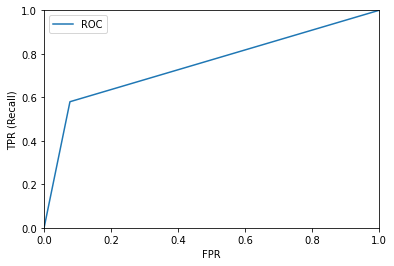

In [72]:
from sklearn.metrics import roc_curve
def roc_curve_plot(test_y, grid_pred):
    fprs, tprs, thresholds = roc_curve(test_y, grid_pred)
    
    plt.plot(fprs, tprs, label='ROC')
    
    start, end = plt.xlim()
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR')
    plt.ylabel('TPR (Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(test_y, grid_pred)

## 2. Fill NA - median

In [73]:
# Split train and test data
from sklearn.model_selection import train_test_split

X = data_new.drop(['Potability'], axis=1)
y = data_new.Potability

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1)
train = pd.concat([train_X, train_y], axis=1)
test = pd.concat([test_X, test_y], axis=1)

# Classify each dataset by label

train_potable = train[train['Potability']==1]
train_notpotable = train[train['Potability']==0]
test_potable = test[test['Potability']==1]
test_notpotable = test[test['Potability']==0]

# Fill NA of ph with means
train_potable_ph_med = train_potable['ph'].median()
train_potable['ph'] = train_potable['ph'].fillna(train_potable_ph_med)
train_notpotable_ph_med = train_notpotable['ph'].median()
train_notpotable['ph'] = train_notpotable['ph'].fillna(train_notpotable_ph_med)
test_potable['ph'] = test_potable['ph'].fillna(train_potable_ph_med)
test_notpotable['ph'] = test_notpotable['ph'].fillna(train_notpotable_ph_med)

# fill NA of Sulfate
train_potable_SF_med = train_potable['Sulfate'].median()
train_potable['Sulfate'] = train_potable['Sulfate'].fillna(train_potable_SF_means)
train_notpotable_SF_med = train_notpotable['Sulfate'].median()
train_notpotable['Sulfate'] = train_notpotable['Sulfate'].fillna(train_notpotable_SF_med)
test_potable['Sulfate'] = test_potable['Sulfate'].fillna(train_potable_SF_med)
test_notpotable['Sulfate'] = test_notpotable['Sulfate'].fillna(train_notpotable_SF_med)

# Fill NA of Trihalomethanes
train_potable_TM_med = train_potable['Trihalomethanes'].median()
train_potable['Trihalomethanes'] = train_potable['Trihalomethanes'].fillna(train_potable_TM_med)
train_notpotable_TM_med = train_notpotable['Trihalomethanes'].median()
train_notpotable['Trihalomethanes'] = train_notpotable['Trihalomethanes'].fillna(train_potable_TM_med)
test_potable['Trihalomethanes'] = test_potable['Trihalomethanes'].fillna(train_potable_TM_med)
test_notpotable['Trihalomethanes'] = test_notpotable['Trihalomethanes'].fillna(train_notpotable_TM_med)

# 
train = pd.concat([train_potable, train_notpotable], axis=0)
test = pd.concat([test_potable, test_notpotable], axis=0)
print('train data의 NA 개수:', train.isna().sum())
print('test data의 NA 개수:', test.isna().sum())

#
train_X = train.drop(['Potability'], axis=1)
train_y = train.Potability
test_X = test.drop(['Potability'], axis=1)
test_y = test.Potability

train data의 NA 개수: ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
test data의 NA 개수: ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


<ipython-input-73-d63ed32aa631>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_potable['ph'] = train_potable['ph'].fillna(train_potable_ph_med)
<ipython-input-73-d63ed32aa631>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_notpotable['ph'] = train_notpotable['ph'].fillna(train_notpotable_ph_med)
<ipython-input-73-d63ed32aa631>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [74]:
train_s_X, train_s_y = sampling(train)

            ph    Hardness        Solids  Chloramines     Sulfate  \
1958  7.154736  198.147326  32680.977991     8.972661  283.108492   
2455  7.065465  176.413638  12674.672773     8.988477  354.768115   
1458  8.163074  162.231846  10494.573369     8.087496  423.952028   
1831  7.079304  137.007355  24282.154769     5.705693  433.633900   
1560  6.460034  215.440641  35775.793396     6.502544  307.563455   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
1958    531.602634       19.806287        81.926826   4.629956           1  
2455    344.420435       12.682869        83.567356   4.403877           1  
1458    487.318346       16.011608        69.976719   4.128193           0  
1831    342.725318        9.113945        88.328605   5.553174           0  
1560    365.094143        8.127543        77.554953   3.535598           1  


In [75]:
train_s_X, test_X = scaler_samples(train_s_X, test_X)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
  
# define parameter search space
param_grid = {'n_estimators': [20, 50, 100, 200, 350, 500],
              'min_samples_leaf': [2, 10, 30],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']} 
clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 3, scoring='f1')
  
# fit the model for grid search
grid.fit(train_s_X, train_s_y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.858 total time=   0.2s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.799 total time=   0.1s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.823 total time=   0.1s
[CV 4/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.828 total time=   0.1s
[CV 5/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.846 total time=   0.1s
[CV 1/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.867 total time=   0.4s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.796 total time=   0.3s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.832 total time=   0.4s
[

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [20, 50, 100, 200, 350, 500]},
             scoring='f1', verbose=3)

In [77]:
# print best parameters after grid search
print(grid.best_params_)
  
# print how the best model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 500}
RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       n_estimators=500)


In [85]:
grid_pred = grid.predict(test_X)
print("accuracy: %.2f" % accuracy(test_y, grid_pred))
print('precision score: ', precision_score(test_y,grid_pred))
print('f1 score: ', f1_score(test_y, grid_pred))

accuracy: 0.62
precision score:  0.5901639344262295
f1 score:  0.4832214765100671


In [ ]:
confusion_matrix(test_y, grid_pred)

## 3. Remove NA

In [79]:
data2 = data_new.dropna(axis=0)
X = data2.drop(['Potability'], axis=1)
y = data2.Potability

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1)

train = pd.concat([train_X, train_y], axis=1)

In [80]:
train_s_X, train_s_y = sampling(train)
train_s_X, test_X = scaler_samples(train_s_X, test_X)

             ph    Hardness        Solids  Chloramines     Sulfate  \
3227   7.679595  200.072928  32000.843911     7.633725  290.740337   
1066   8.567044  160.217867  23683.110190     4.286930  360.286282   
117   10.111977  240.432100  15331.302692     5.392651  361.902926   
1097   7.808012  179.799917  17037.725367     6.378364  348.071511   
2775   4.865444  114.463900  32858.483096     7.473070  365.301135   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3227    583.608398       16.844509        39.367056   3.297525           1  
1066    490.512539        9.027167        67.476229   2.804927           0  
117     403.041810       16.131124        61.111146   3.425763           0  
1097    590.060546       12.092499        81.592362   4.165550           1  
2775    533.303221       16.151600        45.647388   5.070254           1  


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
  
# define parameter search space
param_grid = {'n_estimators': [20, 50, 100, 200, 350, 500],
              'min_samples_leaf': [2, 10, 30],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']} 
clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 3, scoring='f1')
  
# fit the model for grid search
grid.fit(train_s_X, train_s_y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.818 total time=   0.1s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.811 total time=   0.1s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.855 total time=   0.1s
[CV 4/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.859 total time=   0.1s
[CV 5/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=20;, score=0.796 total time=   0.1s
[CV 1/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.865 total time=   0.3s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.804 total time=   0.3s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.856 total time=   0.3s
[

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [20, 50, 100, 200, 350, 500]},
             scoring='f1', verbose=3)

In [82]:
# print best parameters after grid search
print(grid.best_params_)
  
# print how the best model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 350}
RandomForestClassifier(min_samples_leaf=2, n_estimators=350)


In [86]:
grid_pred = grid.predict(test_X)
print("accuracy: %.2f" % accuracy(test_y, grid_pred))
print('precision score: ', precision_score(test_y,grid_pred))
print('f1 score: ', f1_score(test_y, grid_pred))

accuracy: 0.62
precision score:  0.5901639344262295
f1 score:  0.4832214765100671


In [87]:
confusion_matrix(test_y, grid_pred)

array([[88, 25],
       [52, 36]])